# Scipy for Optimization

A great deal of what we do in finance is optimisation. We will therefore find we need an optimiser. Scipy provides an optimiser that we will use now.

## Function Minimisation

Find the minimum of $f(x)=\exp((x-0.7)^2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## One-Dimensional Function

In [2]:
# Define the function
def f(x):
     return -np.exp(-(x-0.7)**2)

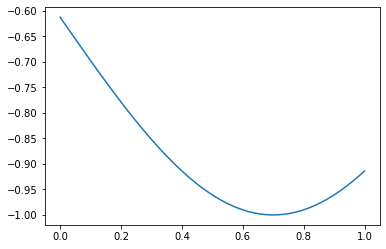

In [3]:
# Use Numpys vector to get back a vector of function values and plot them
x = np.linspace(0.0,1.0,50)
plt.plot(x,f(x));

In [4]:
from scipy.optimize import minimize_scalar

In [5]:
# This uses Brent's method to get the minimimum of a function
# You can impose bounds but no other constraints
result = minimize_scalar(f)

In [6]:
result

     fun: -1.0
    nfev: 13
     nit: 9
 success: True
       x: 0.6999999997839409

## Non-Convex Function

In [7]:
def f(x):
    return (x - 2.0) * x * (x + 2.0)**2

In [8]:
x = np.linspace(-3.0,2.0,50)

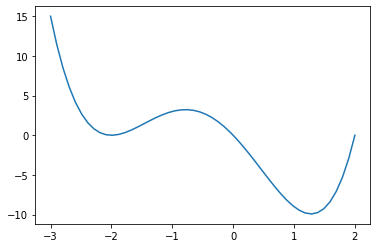

In [9]:
plt.plot(x,f(x));

In [10]:
# The solution found depends on the initial starting point
result = minimize_scalar(f, bounds=(-3,-1), method = "Bounded")

In [11]:
print(result)

     fun: 3.2836517984978577e-13
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -2.000000202597239


In [12]:
# With no bounds it finds the global minimum
result = minimize_scalar(f)

In [13]:
print(result)

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458


# Multidimensional Minimization

We examine problems where we have more than one variable to minimise.

## Unconstrained

In [14]:
from scipy.optimize import minimize

In [15]:
def fn(x):
    n = len(x)
    v = 0.
    for i in range(0,n):
        v = v + (x[i]-i)*(x[i]-i)
    return v

In [16]:
# All variables must be positive and less than 5
bnds = ((0, 5), (0, 5), (0,5), (0,5))
x0 = (0,0,0,0)

In [17]:
res = minimize(fn, x0, bounds=bnds)

In [18]:
print(res)

      fun: 9.300080986551892e-16
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.00000000e-08, -1.19063320e-08,  6.48738290e-08, -5.13300691e-09])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.        , 0.99999999, 2.00000003, 2.99999999])


We find the expected solutions of 0, 1, 2, 3

## Constrained

We now impose constraints on the variables.

In [19]:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[1] - 2 * x[3] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[2] + 2 * x[3] + 2})

In [20]:
res = minimize(fn, x0, bounds=bnds,constraints=cons)

In [21]:
res

     fun: 0.19999999999999973
     jac: array([ 1.49011612e-08, -3.99999995e-01,  5.58793545e-09, -7.99999978e-01])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.01380567e-16, 7.99999995e-01, 1.99999999e+00, 2.60000000e+00])

In [22]:
res.x

array([1.01380567e-16, 7.99999995e-01, 1.99999999e+00, 2.60000000e+00])

In [23]:
res.fun

0.19999999999999973

In [24]:
res.success

True

In [25]:
res.message

'Optimization terminated successfully'

In [26]:
res

     fun: 0.19999999999999973
     jac: array([ 1.49011612e-08, -3.99999995e-01,  5.58793545e-09, -7.99999978e-01])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.01380567e-16, 7.99999995e-01, 1.99999999e+00, 2.60000000e+00])

The constrained solutions are now 0.0, 0.8, 2.0, 2.6.